# SENTIMENT ANALYSIS DURING INDONESIA'S ELECTION 2019
In this Jupyter Notebook, we will delve into the world of sentiment analysis by exploring how social media users expressed their sentiments during the 2019 Indonesian election. The 2019 election was a pivotal moment in Indonesian politics, and it generated a wealth of online conversations and opinions. Our analysis will be based on a dataset containing tweets from Twitter platform. 

In [1]:
import pandas as pd

In [2]:
df_twitter = pd.read_csv("C:/Users/ejhas/OneDrive/Documents/miracles/JOBS/AI Bootcamp/project1/Dataset/tweet.csv")
#df_twitter = df_twitter.rename(columns={'Unnamed: 0': '', 'column2': 'sentiment', 'column3': 'tweet'})

In [3]:
# Missing value percentage checking
missing_percentage = (df_twitter.isnull().sum() / len(df_twitter)) * 100

# Show the missing percentage
print(missing_percentage)

Unnamed: 0    0.0
sentimen      0.0
tweet         0.0
dtype: float64


In [4]:
df_twitter.sample(10)

,Unnamed: 0,sentimen,tweet
1115,1115,negatif,Si jae ngajarain ekonomi ke Prabowo Sandi yg s...
443,443,negatif,MASALAHNYA DULU KAMU JANJI PERTUMBUHAN EKONOMI...
1128,1128,positif,Gaji Prabowo-Sandi tidak akan diambil sepeserp...
1183,1183,netral,"Kalo kata pak wowo : @Jokowi gak salah kok, ya..."
702,702,negatif,"Pak Jokowi, tolong kondisikan harga Pringles O..."
553,553,positif,"SUDAH WAKTUNYA GANTI PEMIMPIN, KARENA KAMI BUT..."
1104,1104,positif,Prabowo sandi Masalah ekonomi kerakyatan #2019...
617,617,positif,Saya kadang pengin nyumbang kaum dhuafa tp ang...
632,632,positif,Prabowo sandi karna gaji mereka selama 5 thn a...
1053,1053,negatif,Kata prabowo harga dari petani naik tapi harga...


In [5]:
#!pip install scikit-learn
#!pip install nlp_id

In [6]:
print(df_twitter['tweet'])

0       Kata @prabowo Indonesia tidak dihargai bangsa ...
1       Batuan Langka, Tasbih Jokowi Hadiah dari Habib...
2       Di era Jokowi, ekonomi Indonesia semakin baik....
3       Bagi Sumatera Selatan, Asian Games berdampak p...
4       Negara kita ngutang buat bngun infrastruktur y...
                              ...                        
1810    Negarawan sejati sll bangga dan mengedepankan ...
1811    1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812    Mari bangun bangsa dgn mendukung perekonomian ...
1813    Bantu majukan perekonomian bangsa bersama Pak ...
1814    Pak @jokowi mengubah cara pandang ekonomi. Kin...
Name: tweet, Length: 1815, dtype: object


### Tweet Removal

In [7]:
import re

In [8]:
def clean_tweet(tweet):
    # Remove hashtags
    tweet = re.sub(r"#\w+", "", tweet)

    # Remove non-alphanumeric characters
    tweet = re.sub(r"[^\w\s]+", "", tweet)

    # Remove extra spaces
    tweet = re.sub(r"\s+", " ", tweet)
    
     # Remove white spaces
    tweet = re.sub(' +', ' ', tweet)
    return tweet.strip()

In [9]:
# Convert non-string data to strings and apply the clean_tweet function to the "tweet" column
df_twitter['tweet'] = df_twitter['tweet'].apply(lambda x: clean_tweet(str(x)))

In [10]:
# Display the cleaned tweets
df_twitter['tweet'].sample(10)

216     Saya selalu berdoa dalam hatiagar pak prabowo ...
725     Pertumbuhan ekonomi konsisten Ga Ada alasan ga...
192     Ya drpd mikirin yg kyk gtu mending mikirin hal...
1305    Jiahhhh udeh dikerjain sama Pak Jokowi kaliiii...
1414    Pak prabowo sandiuno boleh ya pak nanti sebagi...
1801    Pendidikan itu penting Diwilayah timur sangat ...
424     Di jaman SBY harga pupuk murah di jaman bpk pu...
261     17 april 2019 Marilah kita subuh berjamaah Kit...
56      4 Jokowi Naikkan Tax Ratio Drastis Bisa Guncan...
323     Kalo prabowo terpilih ya benar ekonomi makin b...
Name: tweet, dtype: object

### Punctuation Removal

In [11]:
def remove_punctuation(text):
    if isinstance(text, str):
        # Apply punctuation removal only to string values
        cleaned_text = re.sub(r'[^\w\s]', '', text)
        return cleaned_text
    else:
        # Return the input as is for non-string values
        return text

In [12]:
# Apply the remove_punctuation function to the "tweet" column
df_twitter['tweet'] = df_twitter['tweet'].apply(remove_punctuation)

In [13]:
# Display the clenaed text
df_twitter['tweet'].sample(10)

48     Monggo silahkanitu hak andahargai juga kami yg...
766    Saya secara pribadi tidak percaya Prabowo dan ...
903    Jokowi vs Sandi Debat Ekonomi Makro dan Mikro ...
192    Ya drpd mikirin yg kyk gtu mending mikirin hal...
436    mantap semoga roda ekonomi papua berjalan lebi...
202         Gaji karyawan yang terkatungkatung apa kabar
706    Bila Menang Pilpres PrabowoSandi Janji Tidak A...
834    Wahhh niru capressnya nih gak menghargai presi...
344    Di Debat Terakhir Capres Prabowo Sebut Ekonomi...
121    Dulu sekadar ada pertumbuhan ekonomi tanpa pem...
Name: tweet, dtype: object

### Special Character Removal

In [14]:
def remove_special_character(text):
    # Remove special characters using a regular expression
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

In [15]:
# Apply the remove_special_character function to the "tweet" column
df_twitter['tweet'] = df_twitter['tweet'].apply(remove_special_character)

In [16]:
# Display the original and cleaned tweets
df_twitter['tweet'].sample(10)

265     Jokowi dan Raja Salman Sepakat Tingkatkan Kerj...
1666    sebenarnya 02 sangat lihai membawa isu ekonomi...
1620    Sementara menurut prabowo BUMN adalah benteng ...
1667    siapa yang paling diuntungkan dari kebijakan m...
1783                     Ekonomi membaik rakyat sejahtera
1022    Terlihat jelas dalam debat terakhir Jokowi san...
252     PrabowoSandi memang pasangan yang harmonis tah...
381     Garagara ketimpangan ekonomi Prabowo Salahkan ...
164     Litah tk bertulngowo bilng mndiri di kaki sndi...
1717    Gaji sandi dan prabowo akan disumbangkan untuk...
Name: tweet, dtype: object

### Emoji Removal

In [17]:
def remove_emoji_emoticon(text):
    # Remove emojis and emoticons using a regular expression
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "]+", flags=re.UNICODE)
    cleaned_text = emoji_pattern.sub(r'', text)
    return cleaned_text

In [18]:
# Apply the remove_emoji_emoticon function to the "tweet" column
df_twitter['tweet'] = df_twitter['tweet'].apply(remove_emoji_emoticon)

In [19]:
# Display the original and cleaned tweets
df_twitter['tweet'].sample(10)

1165    Jelas prabowo ga paham konsep ekonomi httpstwi...
1088    Narasi nya ngaco Referensi hanya dari Atta hal...
459     Sebelumnya harga BBM di Papua senilai Rp 10000...
183     Gileee Ratusan juta mata menonton menyaksikan ...
59      Jokowi KHMarufAmin 17 April Pilih JokowiKMA Pa...
609     Komentarnya bagus Tapi alangkah indshnya jika ...
1661    Gaji presiden kurang lebih cuma 65jt Itu Prabo...
1404    Kenaikan gaji kalian dirapel besok cuma naik 5...
772     Cuaca cerah menyambut kedatangan Presiden joko...
1311    Menjelma Seperti Donald Trump Buat Omong Koson...
Name: tweet, dtype: object

### HTTPS

In [20]:
def remove_url_and_twitter_pics(text):
    # Delete URL
    df_twitter['tweet'] = df_twitter['tweet'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x, flags=re.MULTILINE))
    # Delete link to pictures
    df_twitter['tweet'] = df_twitter['tweet'].apply(lambda x: re.sub(r'pic.twitter.com/\S+', '', x))
    return tweets_no_url_no_pics

In [21]:
df_twitter['tweet'].sample(10)

476     Coba lu ngmng gini waktu jaman Lulung dan MTop...
1344    Jangan percaya dgn janji calon pemimpin yg tid...
1230    Mau gaji gk dibayar seperti di kiani kertas ap...
39      Bersatu Bersama JokowiKMA Berbagai pencapaian ...
498     Kadang bingung juga mereka2 yg tak bersyukur a...
284       Ada bukti harga barang di sana turun KARENA TOL
22      prabowo apa bapak gak menghargai relawan yg pu...
1629    Gw streaming IDN Times ada narsum yg ngejelasi...
378     Dewi Dan Dedi Jadi Andalan Pemerataan Ekonomi ...
2       Di era Jokowi ekonomi Indonesia semakin baik p...
Name: tweet, dtype: object

### Slang Word Conversion

In [22]:
import re
import pandas as pd

# Load the slang word dictionary from 'slangwords.txt'
kamusSlang = eval(open("C:/Users/ejhas/OneDrive/Documents/miracles/JOBS/AI Bootcamp/project1/Dataset/slangwords.txt").read())

# Define a function to convert slang words to standard words
def convertTokamusSlang(text):
    # Create a regex pattern to match slang words
    pattern = re.compile(r'\b(' + '|'.join(kamusSlang.keys()) + r')\b')

    # Function to replace slang words with standard words
    def replace_slang(match):
        return kamusSlang[match.group()]

    # Apply the pattern substitution to the text
    filtered_text = pattern.sub(replace_slang, text)

    return filtered_text.lower()  # Optionally convert to lowercase

# Apply the conversion function to your DataFrame's 'tweet' column
df_twitter['tweet'] = df_twitter['tweet'].apply(convertTokamusSlang)


In [23]:
print(df_twitter['tweet'])

0       kata prabowo indonesia tidak dihargai bangsa a...
1       batuan langka tasbih jokowi hadiah dari habib ...
2       di era jokowi ekonomi indonesia semakin baik p...
3       bagi sumatera selatan asian games berdampak pa...
4       negara kita hutang buat bngun infrastruktur ya...
                              ...                        
1810    negarawan sejati selalu bangga dan mengedepank...
1811    1 hrs ceramah di damai indonesiaku 2 perekonom...
1812    mari bangun bangsa dengan mendukung perekonomi...
1813    bantu majukan perekonomian bangsa bersama pak ...
1814    pak jokowi mengubah cara pandang ekonomi kini ...
Name: tweet, Length: 1815, dtype: object


### ALAY CONVERSION

In [24]:
# Load the alays word dictionary 
kamusAlay = pd.read_csv("C:/Users/ejhas/OneDrive/Documents/miracles/JOBS/AI Bootcamp/project1/Dataset/kamusalay.csv", header=None, names=['slang', 'conversion'])
kamusAlay

,slang,conversion
0,ajh,saja
1,ajj,saja
2,akoh,aku
3,amaca,ah masa
4,amuh,kamu
...,...,...
233,yap,ya
234,yaw,ya
235,yoi,iya
236,yups,ya


In [25]:
# Create a dictionary from the DataFrame
kamusSlang = dict(zip(kamusAlay['slang'], kamusAlay['conversion']))

# Define a function to convert slang words to standard words
def convertToSlangword(text):
    # Create a regex pattern to match slang words
    pattern = re.compile(r'\b(' + '|'.join(kamusSlang.keys()) + r')\b')

    # Function to replace slang words with standard words
    def replace_slang(match):
        return kamusSlang[match.group()]

    # Apply the pattern substitution to the text
    filtered_text = pattern.sub(replace_slang, text)

    return filtered_text.lower()  # Optionally convert to lowercase

# Apply the conversion function to your DataFrame's 'tweet' column
df_twitter['tweet'] = df_twitter['tweet'].apply(convertToSlangword)


In [26]:
df_twitter['tweet'].sample(10)

905     jokowi jawab kritik pertumbuhan ekonomi 5 dan ...
210     janji tak ambil gaji prabowosandi persis donal...
355     jokowi ri akan masuk 4 besar kekuatan ekonomi ...
73      leres pakdhe salah satu aspek penting dari fak...
258     pak jokowi kalau bapak jadi boleh tidak saya m...
272     do kamu want to test ur vice president sir  sa...
1550    setuju karena juga sudah diakui pak prabowo ka...
173     digital itu penting tapi swasembada pangan har...
128     saya kasih taujokowi bangunkan spbu pertama se...
1784    4 th sejak kepemimpinan jokowi ekonomi btam te...
Name: tweet, dtype: object

In [27]:
print(df_twitter['tweet'])

0       kata prabowo indonesia tidak dihargai bangsa a...
1       batuan langka tasbih jokowi hadiah dari habib ...
2       di era jokowi ekonomi indonesia semakin baik p...
3       bagi sumatera selatan asian games berdampak pa...
4       negara kita hutang buat bngun infrastruktur ya...
                              ...                        
1810    negarawan sejati selalu bangga dan mengedepank...
1811    1 hrs ceramah di damai indonesiaku 2 perekonom...
1812    mari bangun bangsa dengan mendukung perekonomi...
1813    bantu majukan perekonomian bangsa bersama pak ...
1814    pak jokowi mengubah cara pandang ekonomi kini ...
Name: tweet, Length: 1815, dtype: object


### SHORTWORDS CONVERSION

In [28]:
# Load the shortwords dictionary 
shortwords = pd.read_csv("C:/Users/ejhas/OneDrive/Documents/miracles/JOBS/AI Bootcamp/project1/Dataset/singkatan-lib.csv", header=None, names=['short', 'conversion'])
shortwords

,short,conversion
0,aja,saja
1,akn,akan
2,aku,saya
3,amien,aamiin
4,amin,aamiin
...,...,...
180,y,ya
181,yg,yang
182,yng,yang
183,endonesa,indonesia


In [29]:
# Create a dictionary from the DataFrame
kamusSlang = dict(zip(shortwords['short'], shortwords['conversion']))

# Define a function to convert short words to standard words
def convertToShortWord(text):
    # Create a regex pattern to match short words
    pattern = re.compile(r'\b(' + '|'.join(re.escape(k) for k in kamusSlang.keys()) + r')\b')

    # Function to replace short words with standard words
    def replace_short(match):
        return kamusSlang[match.group()]

    # Apply the pattern substitution to the text
    filtered_text = pattern.sub(replace_short, text)

    return filtered_text.lower()  # Optionally convert to lowercase

# Apply the conversion function to your DataFrame's 'tweet' column
df_twitter['tweet'] = df_twitter['tweet'].apply(convertToShortWord)


In [30]:
print(df_twitter['tweet'])

0       kata prabowo indonesia tidak dihargai bangsa a...
1       batuan langka tasbih jokowi hadiah dari habib ...
2       di era jokowi ekonomi indonesia semakin baik p...
3       bagi sumatera selatan asian games berdampak pa...
4       negara kita hutang buat bngun infrastruktur ya...
                              ...                        
1810    negarawan sejati selalu bangga dan mengedepank...
1811    1 harus ceramah di damai indonesiaku 2 perekon...
1812    mari bangun bangsa dengan mendukung perekonomi...
1813    bantu majukan perekonomian bangsa bersama pak ...
1814    pak jokowi mengubah cara pandang ekonomi kini ...
Name: tweet, Length: 1815, dtype: object


### STOPWORDS REMOVAL

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from nlp_id import StopWord

stopword = StopWord()
stop_words = stopword.get_stopword()
print(stop_words)

['ada', 'adalagi', 'adalah', 'adanya', 'adapun', 'agak', 'agak-agak', 'agaknya', 'agar', 'aja', 'akan', 'akankah', 'akankan', 'akhir', 'akhir-akhirnya', 'akhirannya', 'akhiri', 'akhirinya', 'akhirnya', 'aku', 'akulah', 'akunya', 'akurat', 'akutu', 'ala', 'alamak', 'alhamdulillah', 'alhasil', 'amat', 'amat-amat', 'amatlah', 'anda', 'anda-anda', 'andai', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apa-apanya', 'apaan', 'apabila', 'apaitu', 'apakah', 'apalagi', 'apanya', 'apasaja', 'apatah', 'apesnya', 'arah', 'artinya', 'asal', 'asalkan', 'asumsinya', 'asumsikan', 'atas', 'atas-atas', 'atas-batas', 'ataspun', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagi-bagi', 'bagian', 'bagikan', 'bahasakan', 'bahasanya', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bak', 'bakal', 'bakal-bakal', 'bakalan', 'balik', 'balikan', 'balikkan', 'banget', 'banget-banget', 'banyak', 'barangkali', 'baru', 'baru-baru', 'bawah',

In [32]:
# Function to remove stopwords from a text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'tweet' column
df_twitter['tweet'] = df_twitter['tweet'].apply(remove_stopwords)

In [33]:
print(df_twitter['tweet'])

0       prabowo indonesia dihargai bangsa asing berita...
1       batuan langka tasbih jokowi hadiah habib luthf...
2       era jokowi ekonomi indonesia pictwittercomw2yt...
3       sumatera selatan asian games berdampak ekonomi...
4       negara hutang bngun infrastruktur dipake masya...
                              ...                        
1810    negarawan sejati bangga mengedepankan harga ba...
1811    1 ceramah damai indonesiaku 2 perekonomian mem...
1812    mari bangun bangsa mendukung perekonomian nega...
1813    bantu majukan perekonomian bangsa jokowi yuk h...
1814    jokowi mengubah pandang ekonomi orang terhubun...
Name: tweet, Length: 1815, dtype: object


### Stemming or Lemmatization

In [34]:
#!pip install Sastrawi
#!pip install swifter

In [35]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [36]:
# Create a stemmer instance
stemmer = StemmerFactory().create_stemmer()

In [37]:
import tqdm

In [38]:
%%time

# Apply stemming to the 'tweet' column and print the results
df_twitter['tweet'] = [stemmer.stem(x) for x in tqdm.tqdm(df_twitter['tweet'])]
print(df_twitter['tweet'])

100%|██████████████████████████████████████████████████████████████████████████████| 1815/1815 [15:02<00:00,  2.01it/s]

0       prabowo indonesia harga bangsa asing berita is...
1       batu langka tasbih jokowi hadiah habib luthfi ...
2       era jokowi ekonomi indonesia pictwittercomw2yt...
3       sumatera selatan asi games dampak ekonomi lang...
4       negara hutang bngun infrastruktur dipake masya...
                              ...                        
1810    negarawan sejati bangga depan harga bangsa daulat
1811             1 ceramah damai indonesia 2 ekonomi baik
1812    mari bangun bangsa dukung ekonomi negara jokow...
1813    bantu maju ekonomi bangsa jokowi yuk httpstwit...
1814    jokowi ubah pandang ekonomi orang hubung indon...
Name: tweet, Length: 1815, dtype: object
CPU times: total: 11min 4s
Wall time: 15min 2s


### REPLACE NUMBER TO WORDS

In [39]:
def replace_numbers(text):
    text = text.replace('01', 'jokowi')
    text = text.replace('02', 'prabowo')
    text = text.replace('1', 'jokowi')
    text = text.replace('2', 'prabowo')
    
    return text

In [40]:
# Apply the replace_numbers function element-wise using the apply method
df_twitter['tweet'] = df_twitter['tweet'].apply(replace_numbers)

In [41]:
# Print the modified 'tweet' column
print(df_twitter['tweet'])

0       prabowo indonesia harga bangsa asing berita is...
1       batu langka tasbih jokowi hadiah habib luthfi ...
2       era jokowi ekonomi indonesia pictwittercomwpra...
3       sumatera selatan asi games dampak ekonomi lang...
4       negara hutang bngun infrastruktur dipake masya...
                              ...                        
1810    negarawan sejati bangga depan harga bangsa daulat
1811    jokowi ceramah damai indonesia prabowo ekonomi...
1812    mari bangun bangsa dukung ekonomi negara jokow...
1813    bantu maju ekonomi bangsa jokowi yuk httpstwit...
1814    jokowi ubah pandang ekonomi orang hubung indon...
Name: tweet, Length: 1815, dtype: object


### Word Tokenization

In [42]:
import nltk
#nltk.download('punkt')

In [43]:
from nltk.tokenize import word_tokenize

# Define a function to perform word tokenization
def word_tokenization(text):
    tokens = word_tokenize(text)
    return tokens

In [44]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [45]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_twitter["tweet"].tolist())
pos_count = 1 + X[df_twitter["sentimen"] == "positif"].sum(0)
neg_count = 1 + X[df_twitter["sentimen"] == "negatif"].sum(0)
pos_weights = np.array(pos_count / pos_count.sum())[0]
neg_weights = np.array(neg_count / neg_count.sum())[0]
#np.log(np.array(pos_count / pos_count.sum() / (neg_count / neg_count.sum())))[0]
#weights = np.array(pos_count / pos_count.sum() + neg_count / neg_count.sum())[0]

sentiment_words = np.union1d(
    vectorizer.get_feature_names_out()[np.argsort(pos_weights)[::-1][:100]],
    vectorizer.get_feature_names_out()[np.argsort(neg_weights)[::-1][:100]]
)


In [46]:
# Function to remove stopwords from a text
def keep_sentiment_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() in sentiment_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'tweet' column
df_twitter['preprocessed_tweet'] = df_twitter['tweet'].apply(keep_sentiment_words)

In [47]:
# Apply word tokenization to the 'tweet' column
df_twitter['preprocessed_tweet'] = df_twitter['tweet'].apply(word_tokenization)

In [48]:
df_twitter["tweet_len"] = df_twitter['tweet'].apply(word_tokenization).apply(len)

In [49]:
# Display the original 'tweet' and the tokenized result
display(df_twitter['preprocessed_tweet'])

0       [prabowo, indonesia, harga, bangsa, asing, ber...
1       [batu, langka, tasbih, jokowi, hadiah, habib, ...
2       [era, jokowi, ekonomi, indonesia, pictwitterco...
3       [sumatera, selatan, asi, games, dampak, ekonom...
4       [negara, hutang, bngun, infrastruktur, dipake,...
                              ...                        
1810    [negarawan, sejati, bangga, depan, harga, bang...
1811    [jokowi, ceramah, damai, indonesia, prabowo, e...
1812    [mari, bangun, bangsa, dukung, ekonomi, negara...
1813    [bantu, maju, ekonomi, bangsa, jokowi, yuk, ht...
1814    [jokowi, ubah, pandang, ekonomi, orang, hubung...
Name: preprocessed_tweet, Length: 1815, dtype: object

In [50]:
df_twitter['preprocessed_tweet'].apply(len).value_counts().sort_index()

2       1
3       4
4      35
5      42
6      67
7     108
8     119
9     119
10    123
11     96
12    102
13     89
14     72
15     90
16     98
17     65
18     74
19     81
20     82
21     81
22     52
23     31
24     43
25     49
26     14
27     30
28     14
29     13
30     14
31      2
32      4
40      1
Name: preprocessed_tweet, dtype: int64

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

### Model try

In [52]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [53]:
label_encoder = LabelEncoder()
df_twitter['target'] = label_encoder.fit_transform(df_twitter['sentimen'])

In [54]:
df_twitter.sample(20)

,Unnamed: 0,sentimen,tweet,preprocessed_tweet,tweet_len,target
1211,1211,negatif,jokowi main pawang hujan prabowo periode ekono...,"[jokowi, main, pawang, hujan, prabowo, periode...",11,0
772,772,positif,cuaca cerah sambut datang presiden jokowi iria...,"[cuaca, cerah, sambut, datang, presiden, jokow...",24,2
687,687,positif,capai ekonomi indonesia banding negara kembang...,"[capai, ekonomi, indonesia, banding, negara, k...",16,2
1490,1490,positif,aku jujur sembilan bahan pokok mahal kartu min...,"[aku, jujur, sembilan, bahan, pokok, mahal, ka...",18,2
351,351,netral,consol game tu hardware esport manfaat dampak ...,"[consol, game, tu, hardware, esport, manfaat, ...",16,1
1165,1165,negatif,prabowo paham konsep ekonomi httpstwittercomme...,"[prabowo, paham, konsep, ekonomi, httpstwitter...",5,0
828,828,negatif,bowo debat orientasi ekonomi indonesia jalur s...,"[bowo, debat, orientasi, ekonomi, indonesia, j...",11,0
1064,1064,netral,capres nomor urut prabowo prabowo subianto seb...,"[capres, nomor, urut, prabowo, prabowo, subian...",17,1
201,201,netral,om prabs bangkit ekonomi lepas hutang dunia le...,"[om, prabs, bangkit, ekonomi, lepas, hutang, d...",25,1
186,186,negatif,njop nyajadi ngeyel harga tinggi salah,"[njop, nyajadi, ngeyel, harga, tinggi, salah]",6,0


In [55]:
# Filter the DataFrame to exclude rows with "netral" sentiment
X = df_twitter.preprocessed_tweet
Y = df_twitter.target

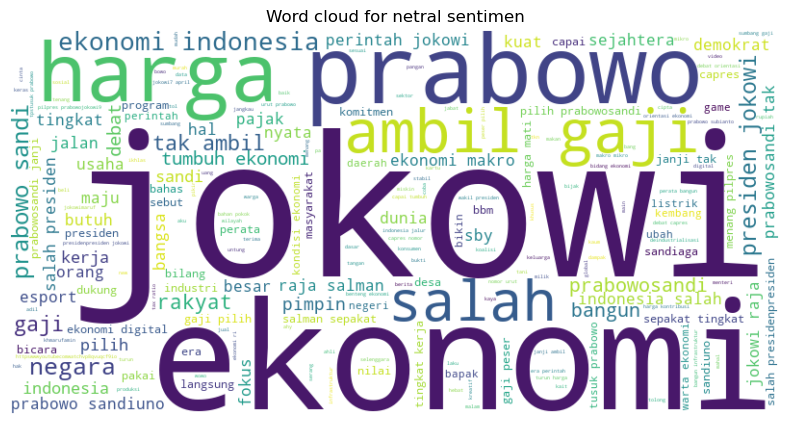

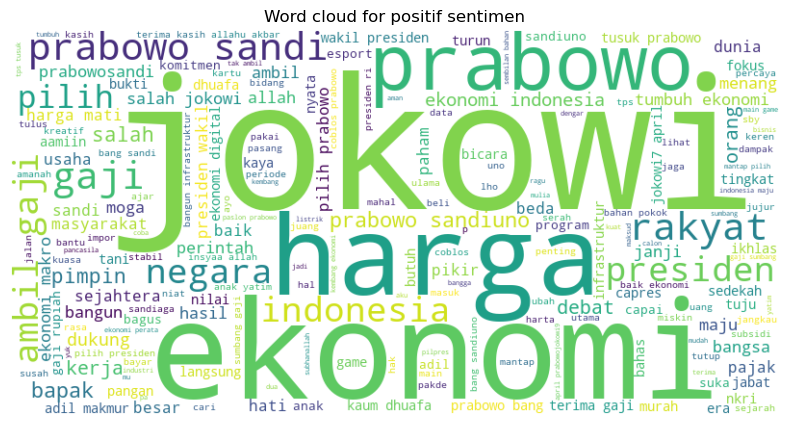

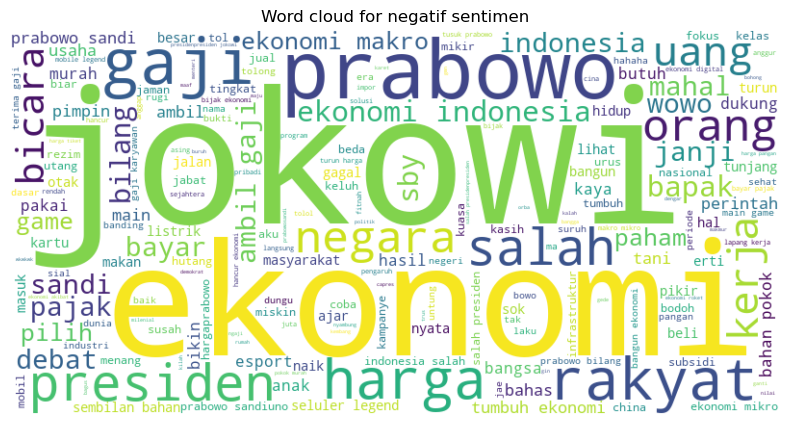

In [233]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the sentiment categories you want to create word clouds for
sentiment_categories = ["netral", "positif", "negatif"]

# Create a word cloud for each sentiment category
for sentiment in sentiment_categories:
    # Filter the DataFrame to include only the rows with the specific sentiment
    sentiment_df = df_twitter[df_twitter['sentimen'] == sentiment]

    # Concatenate the tokenized words for that sentiment into a single string
    all_tokens = ' '.join(sentiment_df['preprocessed_tweet'].explode().astype(str))

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

    # Display the word cloud with the sentiment label
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word cloud for {sentiment} sentimen")
    plt.show()


In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    to_categorical(Y, 3), 
                                                    test_size=0.2,
                                                    random_state=95)

In [182]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 500
max_len = 30
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)


In [183]:
# import numpy as np
# from keras.models import Model
# from keras.layers import Input, Embedding, LSTM, Dense, Dropout, Activation
# from gensim.models.word2vec import Word2Vec

# #np.load("C:\\Users\\ejhas\\Downloads\\archive (4)\\idwiki_word2vec_100.model.wv.vectors.npy").shape
# #np.load("C:\\Users\\ejhas\\Downloads\\archive (4)\\idwiki_word2vec_100.model.trainables.syn1neg.npy").shape
# # Load the pretrained Word2Vec model (you may need to adjust the path)
# word2vec_model = Word2Vec.load("C:\\Users\\ejhas\\Downloads\\word_embeddings\\wiki.id.case.model")
# w2v_vocab = word2vec_model.wv.key_to_index.keys()

In [184]:
# len(w2v_vocab)

In [185]:
# vocab = np.unique(np.concatenate([x.split() for x in df_filtered.tweet]))

# len(vocab), len(np.intersect1d(list(), vocab))

In [186]:
# # Load the pretrained Word2Vec model (you may need to adjust the path)
# word2vec_model = Word2Vec.load('path_to_word2vec_model')

# # Define the vocabulary size and embedding dimension based on the pretrained model
# vocab_size = len(word2vec_model.wv.index2word)
# embedding_dim = word2vec_model.vector_size

# # Build the embedding matrix
# embedding_matrix = np.zeros((vocab_size, embedding_dim))
# for i in range(vocab_size):
#     embedding_matrix[i] = word2vec_model.wv[word2vec_model.wv.index2word[i]]

# # Define your RNN model with the pretrained Word2Vec embedding layer
# def RNN():
#     inputs = Input(name='inputs', shape=[max_len])
#     embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(inputs)
#     layer = LSTM(8)(embedding_layer)
#     layer = Dense(4, name='FC1')(layer)
#     layer = Dropout(0.25)(layer)
#     layer = Activation('relu')(layer)
#     layer = Dropout(0.25)(layer)
#     layer = Dense(1, name='out_layer')(layer)
#     layer = Activation('sigmoid')(layer)
#     model = Model(inputs=inputs, outputs=layer)
#     return model

# # Compile and train your model as usual
# model = RNN()
# model.compile(optimizer='your_optimizer', loss='your_loss_function', metrics=['accuracy'])
# model.summary()

In [216]:
# define RNN
def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 5, input_length=max_len)(inputs)
    layer = LSTM(8)(layer)
    layer = Dense(4, name='FC1')(layer)
    layer = Dropout(0.2)(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(3, name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [217]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Input

In [218]:
model = RNN()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 30)]              0         
                                                                 
 embedding_8 (Embedding)     (None, 30, 5)             2500      
                                                                 
 lstm_8 (LSTM)               (None, 8)                 448       
                                                                 
 FC1 (Dense)                 (None, 4)                 36        
                                                                 
 dropout_16 (Dropout)        (None, 4)                 0         
                                                                 
 activation_16 (Activation)  (None, 4)                 0         
                                                                 
 dropout_17 (Dropout)        (None, 4)                 0   

In [219]:
from keras.callbacks import Callback

In [220]:
#make a callback
class CustomCallback(Callback):
    def on_epoch_end(self, epochs, logs={}):
        if(logs.get('val_accuracy')>0.90):
            print('\nReached 80%, cancel training')
            self.model.stop_training = True

In [221]:
# Instantiate the custom callback
callback = CustomCallback()

In [222]:
model.fit(sequences_matrix, 
          Y_train,
          batch_size=16,
          epochs=25,
          validation_data=(test_sequences_matrix, Y_test),
          #validation_split=0.2, 
          callbacks=[callback]
          )

Epoch 1/25
91/91 [==============================] - 5s 23ms/step - loss: 1.0988 - accuracy: 0.3099 - val_loss: 1.0983 - val_accuracy: 0.3636
Epoch 2/25
91/91 [==============================] - 1s 14ms/step - loss: 1.0969 - accuracy: 0.3629 - val_loss: 1.0929 - val_accuracy: 0.4490
Epoch 3/25
91/91 [==============================] - 1s 16ms/step - loss: 1.0838 - accuracy: 0.4401 - val_loss: 1.0781 - val_accuracy: 0.4738
Epoch 4/25
91/91 [==============================] - 1s 16ms/step - loss: 1.0550 - accuracy: 0.4511 - val_loss: 1.0539 - val_accuracy: 0.4821
Epoch 5/25
91/91 [==============================] - 2s 20ms/step - loss: 1.0092 - accuracy: 0.4904 - val_loss: 1.0233 - val_accuracy: 0.4848
Epoch 6/25
91/91 [==============================] - 1s 14ms/step - loss: 0.9780 - accuracy: 0.4855 - val_loss: 1.0026 - val_accuracy: 0.5179
Epoch 7/25
91/91 [==============================] - 1s 16ms/step - loss: 0.9442 - accuracy: 0.5234 - val_loss: 0.9882 - val_accuracy: 0.5262
Epoch 8/25
91

In [223]:
label_encoder.classes_

array(['negatif', 'netral', 'positif'], dtype=object)

In [224]:
label_encoder.transform(["negatif", "netral", "positif"])

array([0, 1, 2])

In [225]:
baseline_test_acc = np.mean(np.dot(Y_test, np.arange(3)) == 2)
baseline_test_acc

0.3608815426997245

In [226]:
#create a dataframe
model_hist = pd.DataFrame(model.history.history)
model_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,1.098768,0.309917,1.098263,0.363636
1,1.096939,0.362948,1.092854,0.449036
2,1.083789,0.440083,1.078116,0.473829
3,1.055038,0.451102,1.053909,0.482094
4,1.009162,0.490358,1.023299,0.484848


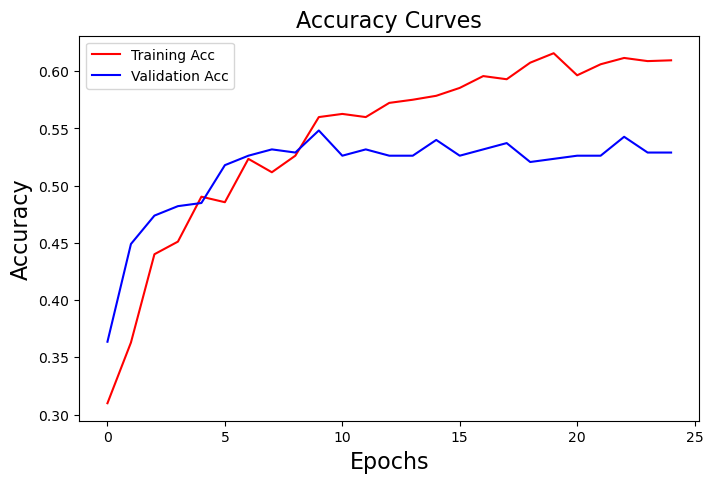

In [227]:
#accuracy vs. val_accuracy plot 
plt.figure(figsize=[8,5])
plt.plot(model_hist['accuracy'], 'r', label='Training Acc')
plt.plot(model_hist['val_accuracy'], 'b', label='Validation Acc')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

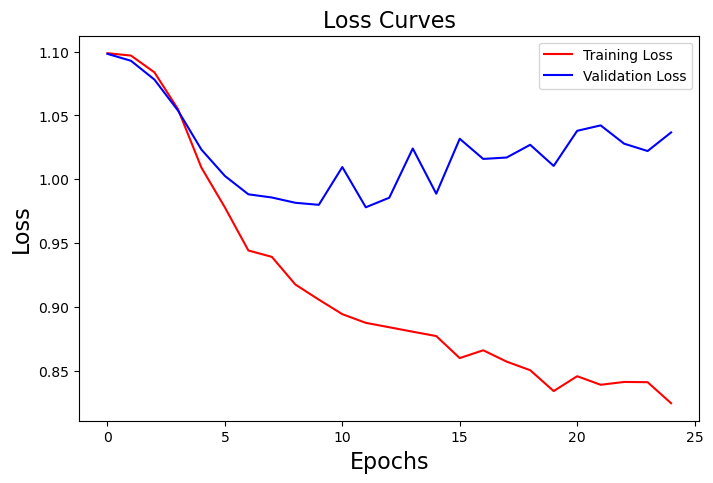

In [228]:
#loss vs. val_loss plot 
plt.figure(figsize=[8,5])
plt.plot(model_hist['loss'], 'r', label='Training Loss')
plt.plot(model_hist['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)
plt.show()

### MODEL EVALUATION

In [229]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [230]:
print(model.input_shape)

(None, 30)
